# Exercises

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

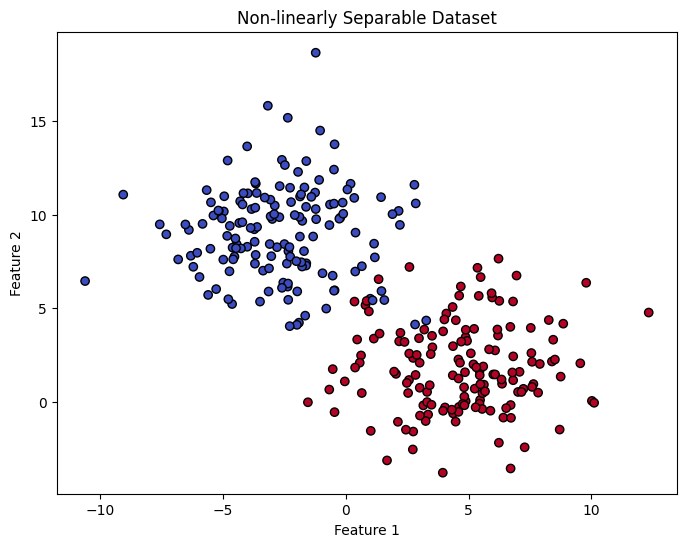

C=0.01 -> Accuracy: 0.9556
C=0.1 -> Accuracy: 0.9556
C=1 -> Accuracy: 0.9556
C=10 -> Accuracy: 0.9556
C=100 -> Accuracy: 0.9556
C=1000 -> Accuracy: 0.9556


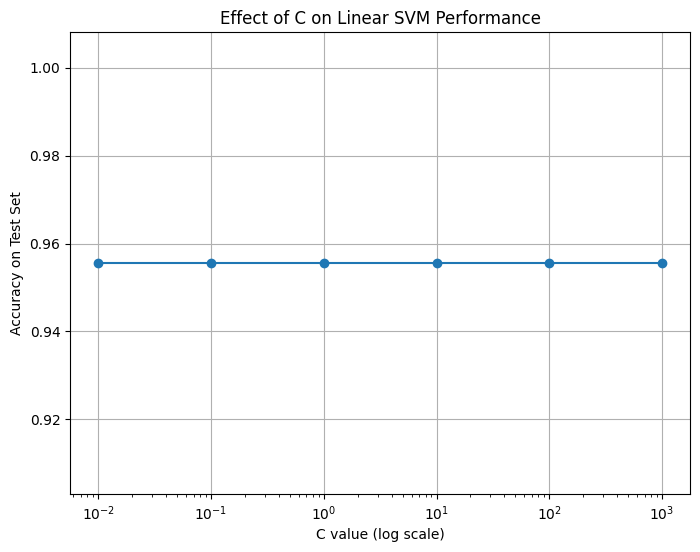


Best C value (based on accuracy): 0.01 with accuracy: 0.9556


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a non-linearly separable dataset
X, y = make_blobs(n_samples=300, centers=2, cluster_std=2.5, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Non-linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of C values to test
C_values = [0.01, 0.1, 1, 10, 100, 1000]
accuracies = []

# Train a linear SVM for each C value and evaluate performance
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"C={C} -> Accuracy: {acc:.4f}")

# Plot accuracy vs C
plt.figure(figsize=(8, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy on Test Set')
plt.title('Effect of C on Linear SVM Performance')
plt.grid(True)
plt.show()

# Print the best C
best_C_index = np.argmax(accuracies)
best_C = C_values[best_C_index]
print(f"\nBest C value (based on accuracy): {best_C} with accuracy: {accuracies[best_C_index]:.4f}")


### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)).
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


<ipython-input-3-00fdd0d89521>:9: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(f)


Linear SVM Accuracy: 1.0000
RBF SVM Accuracy: 1.0000


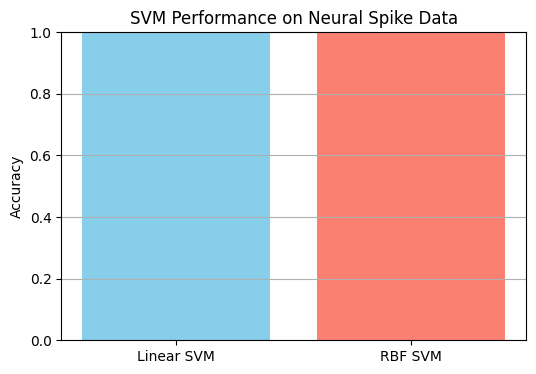

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

with open('simulated_data1.pickle', 'rb') as f:
    data = pickle.load(f)

spike_times = data['spike_times']
stim_onsets = data['stim_onsets']
stim_type = data['stim_type']
stim_duration = data['stim_duration']

# Extract spike counts per neuron per trial
n_cells = len(spike_times)
n_trials = len(stim_onsets)

X = np.zeros((n_trials, n_cells))  # feature matrix
y = stim_type                     # labels (1 or 2)

for i, onset in enumerate(stim_onsets):
    start = onset
    end = onset + stim_duration
    for j in range(n_cells):
        spikes = spike_times[j]
        count = np.sum((spikes >= start) & (spikes < end))
        X[i, j] = count

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear SVM
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

# Train RBF SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# Print comparison
print(f"Linear SVM Accuracy: {acc_linear:.4f}")
print(f"RBF SVM Accuracy: {acc_rbf:.4f}")

# Bar plot of the results
plt.figure(figsize=(6, 4))
plt.bar(['Linear SVM', 'RBF SVM'], [acc_linear, acc_rbf], color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('SVM Performance on Neural Spike Data')
plt.grid(axis='y')
plt.show()


sigma_stim=0.05 | Linear SVM: 0.850, RBF SVM: 0.850
sigma_stim=0.15 | Linear SVM: 0.900, RBF SVM: 0.950
sigma_stim=0.30 | Linear SVM: 1.000, RBF SVM: 1.000
sigma_stim=0.50 | Linear SVM: 1.000, RBF SVM: 1.000
sigma_stim=0.70 | Linear SVM: 1.000, RBF SVM: 1.000


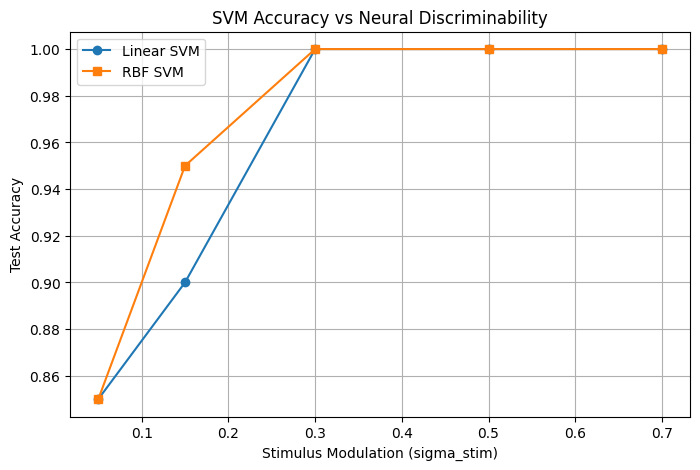

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Settings
sigma_stim_values = [0.05, 0.15, 0.3, 0.5, 0.7]
linear_accuracies = []
rbf_accuracies = []

# Run simulation and classification for each sigma_stim
for sigma_stim in sigma_stim_values:
    # === Simulate data ===
    n_cells = 20
    n_stim_type = 2
    average_firing_rate = 5
    cell_rate_baseline = np.random.exponential(average_firing_rate, size=n_cells)
    modulation = sigma_stim * np.random.normal(0, 1, size=n_cells)
    cell_rate_stim = {
        1: cell_rate_baseline * (1 + modulation),
        2: cell_rate_baseline * (1 - modulation)
    }
    cell_rate_stim[1][cell_rate_stim[1] < 0] = 0
    cell_rate_stim[2][cell_rate_stim[2] < 0] = 0

    s_rate = 10000
    n_stim = 100
    stim_dur = 2
    is_interval = 3

    stim_onsets = np.arange(0, n_stim * (stim_dur + is_interval), (stim_dur + is_interval))
    stim_type = np.asarray([1] * (n_stim // 2) + [2] * (n_stim // 2))
    np.random.shuffle(stim_type)
    time = np.arange(0, (n_stim + 1) * (stim_dur + is_interval), 1.0 / s_rate)

    spike_times = []
    for cell in range(n_cells):
        spikes = np.random.poisson(cell_rate_baseline[cell] / s_rate, size=time.shape)
        for i, stim in enumerate(stim_type):
            stim_idxs = np.arange(int(stim_onsets[i] * s_rate), int((stim_onsets[i] + stim_dur) * s_rate))
            spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stim][cell] / s_rate, size=stim_idxs.shape)
        spike_times.append(time[spikes > 0])

    # === Extract features: spike count per neuron per stimulus ===
    X = np.zeros((len(stim_onsets), n_cells))
    y = stim_type
    for i, onset in enumerate(stim_onsets):
        start = onset
        end = onset + stim_dur
        for j in range(n_cells):
            spikes = spike_times[j]
            count = np.sum((spikes >= start) & (spikes < end))
            X[i, j] = count

    # === Train/test split ===
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # === Train SVMs ===
    lin_svm = SVC(kernel='linear', C=1.0)
    lin_svm.fit(X_train, y_train)
    acc_lin = accuracy_score(y_test, lin_svm.predict(X_test))
    linear_accuracies.append(acc_lin)

    rbf_svm = SVC(kernel='rbf', C=1.0)
    rbf_svm.fit(X_train, y_train)
    acc_rbf = accuracy_score(y_test, rbf_svm.predict(X_test))
    rbf_accuracies.append(acc_rbf)

    print(f"sigma_stim={sigma_stim:.2f} | Linear SVM: {acc_lin:.3f}, RBF SVM: {acc_rbf:.3f}")

# === Plot the results ===
plt.figure(figsize=(8, 5))
plt.plot(sigma_stim_values, linear_accuracies, label='Linear SVM', marker='o')
plt.plot(sigma_stim_values, rbf_accuracies, label='RBF SVM', marker='s')
plt.xlabel('Stimulus Modulation (sigma_stim)')
plt.ylabel('Test Accuracy')
plt.title('SVM Accuracy vs Neural Discriminability')
plt.legend()
plt.grid(True)
plt.show()


### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# === Step 1: Data Simulation Function ===
def simulate_spike_data(n_cells=20, sigma_stim=0.5, noise_amp=1.0, n_stim=100, average_firing_rate=5):
    cell_rate_baseline = np.random.exponential(average_firing_rate, size=n_cells)
    modulation = sigma_stim * np.random.normal(0, 1, size=n_cells)

    # Apply stimulus modulation
    cell_rate_stim = {
        1: cell_rate_baseline * (1 + modulation),
        2: cell_rate_baseline * (1 - modulation)
    }
    cell_rate_stim[1][cell_rate_stim[1] < 0] = 0
    cell_rate_stim[2][cell_rate_stim[2] < 0] = 0

    s_rate = 10000
    stim_dur = 2
    is_interval = 3
    stim_onsets = np.arange(0, n_stim * (stim_dur + is_interval), (stim_dur + is_interval))
    stim_type = np.asarray([1] * (n_stim // 2) + [2] * (n_stim // 2))
    np.random.shuffle(stim_type)
    time = np.arange(0, (n_stim + 1) * (stim_dur + is_interval), 1.0 / s_rate)

    spike_times = []
    for cell in range(n_cells):
        # Add random baseline noise
        spikes = np.random.poisson((cell_rate_baseline[cell] + noise_amp * np.random.randn()) / s_rate, size=time.shape)
        for i, stim in enumerate(stim_type):
          stim_idx = np.arange(int(stim_onsets[i]*s_rate), int((stim_onsets[i] + stim_dur)*s_rate))
          rate = (cell_rate_stim[stim][cell] + noise_amp * np.random.randn()) / s_rate
          rate = max(rate, 0)  # make sure rate is non-negative
          spikes[stim_idx] = np.random.poisson(rate, size=stim_idx.shape)

        spike_times.append(time[spikes > 0])

    # Extract spike counts per trial
    X = np.zeros((n_stim, n_cells))
    for i, onset in enumerate(stim_onsets):
        for j in range(n_cells):
            count = np.sum((spike_times[j] >= onset) & (spike_times[j] < onset + stim_dur))
            X[i, j] = count
    y = stim_type
    return X, y

# === Step 2: Run Simulations ===

# Vary noise amplitude
noise_amps = [0, 1, 2, 3, 4, 5]
noise_results = []
for noise in noise_amps:
    X, y = simulate_spike_data(noise_amp=noise)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    noise_results.append(acc)

# Vary stimulus modulation amplitude
mod_amps = [0.05, 0.1, 0.2, 0.3, 0.5, 0.8]
mod_results = []
for mod in mod_amps:
    X, y = simulate_spike_data(sigma_stim=mod)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    mod_results.append(acc)

# Vary number of neurons
neuron_counts = [5, 10, 20, 40, 80, 100]
neuron_results = []
for n_cells in neuron_counts:
    X, y = simulate_spike_data(n_cells=n_cells)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    neuron_results.append(acc)

# === Step 3: Plot Results ===
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(noise_amps, noise_results, marker='o')
axs[0].set_title("Effect of Noise Amplitude")
axs[0].set_xlabel("Noise Amplitude")
axs[0].set_ylabel("Accuracy")
axs[0].grid(True)

axs[1].plot(mod_amps, mod_results, marker='s', color='green')
axs[1].set_title("Effect of Stimulus Modulation")
axs[1].set_xlabel("Modulation Amplitude (σ)")
axs[1].set_ylabel("Accuracy")
axs[1].grid(True)

axs[2].plot(neuron_counts, neuron_results, marker='^', color='purple')
axs[2].set_title("Effect of Number of Neurons")
axs[2].set_xlabel("Number of Neurons")
axs[2].set_ylabel("Accuracy")
axs[2].grid(True)

plt.tight_layout()
plt.show()


ValueError: lam < 0 or lam is NaN

The plots show that decoding accuracy decreases with higher noise, as variability makes it harder to distinguish stimuli. Accuracy improves with stronger stimulus modulation, since the neural responses become more distinct. Finally, using more neurons leads to better performance, because a larger population provides more information to decode the stimulus reliably.

## Useful code
---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
n_cells = 20; # number of cells to simulate
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation
average_firing_rate = 5; # average firing rate across the population

# generate baseline rates from exponential distirbution
cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

# create stimulus average responses, perturbing the population firng rate profile
# we use a multiplicative modulation in opposite directions for the two stimuli
modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
# sets negative firng rate to 0
cell_rate_stim[1][cell_rate_stim[1]<0]=0
cell_rate_stim[2][cell_rate_stim[2]<0]=0

In [ ]:
# simulate spiking activity

s_rate = 10000 # the sampling rate of our emulated recording system
noise_rate = 1 # we are going to add some spike noise non related to the task
n_stim = 100 # number of stimuli

stim_dur = 2 #stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
np.random.shuffle(stim_type)

time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

spike_times = []
for cell in range(n_cells):
    spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
    for i,stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

    spike_times.append(time[spikes>0])



In [ ]:
# save ouput
out_dict = {'spike_times':spike_times,
            'stim_onsets':stim_onsets,
            'stim_type':stim_type,
            'stim_duration':stim_dur
            }

with open('data/simulated_data1.pickle', 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
